In [1]:
import numpy as np

# 공부한 시간과 점수를 각각 x, y라는 이름의 넘파이 배열로 만듭니다.
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

# x의 평균값을 구합니다.
mx = np.mean(x)

# y의 평균값을 구합니다.
my = np.mean(y)

# 출력으로 확인합니다.
print("x의 평균값: ", mx)
print("y의 평균값: ", my)

# 기울기 공식의 분모 부분입니다.
divisor = sum([(i - mx)**2 for i in x])

# 기울기 공식의 분자 부분입니다.
def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d
dividend = top(x, mx, y, my)

# 출력으로 확인합니다.
print("분모: ", divisor)
print("분자: ", dividend)

# 기울기 a를 구하는 공식입니다.
a = dividend / divisor

# y 절편 b를 구하는 공식입니다.
b = my - (mx*a)

# 출력으로 확인합니다.
print("기울기 a = ", a)
print("y 절편 b = ", b)

x의 평균값:  5.0
y의 평균값:  90.5
분모:  20.0
분자:  46.0
기울기 a =  2.3
y 절편 b =  79.0


In [2]:
from google.colab import drive
drive.mount('/content/drive') # 구글 드라이브 연결

Mounted at /content/drive


In [3]:
!pwd

/content


In [6]:
!ls /content/drive/MyDrive/

 크롤링_bs_selenium.ipynb   ml15_AutoML.ipynb
'Colab Notebooks'	   'Selenium4 사용법.docx'


In [7]:
# 평균제곱오차함수
def mse(y, y_pred): # 실제값, 예측값
  errs = y - (x * a + b) # 실제값과 예측값들의 오차
  return np.mean(errs**2)

mse(y, x*a+b)

8.299999999999985

In [8]:
# 기울기 2.3 평균제곱오차
print('a=1.5', np.mean((y - (x*1.5+79))**2))
print('a=2.3', np.mean((y - (x*2.3+79))**2))
print('a=3.0', np.mean((y - (x*3.0+79))**2))


a=1.5 27.5
a=2.3 8.299999999999985
a=3.0 23.0


In [ ]:
# 경사하강법 한줄씩 테스트


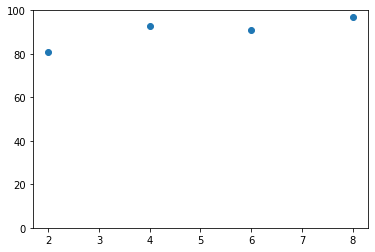

In [16]:
# 경사하강법
import numpy as np
import matplotlib.pyplot as plt

# 공부 시간 X와 성 y의 넘파이 배열을 만듭니다.
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

# 데이터의 분포를 그래프로 나타냅니다.
plt.ylim(0,100)
plt.scatter(x,y)
plt.show()

epoch=2000, 기울기=27.8400, 절편=5.4300
mse= 8225.0
a_diff= -928.0
epoch=0, 기울기=27.8400, 절편=5.4300
a_diff= 796.7
epoch=1, 기울기=3.9390, 절편=2.1822
a_diff= -669.838
epoch=2, 기울기=24.0341, 절편=6.2996
a_diff= 577.0440799999998
epoch=3, 기울기=6.7228, 절편=4.1414
a_diff= -483.21742479999966
epoch=4, 기울기=21.2193, 절편=7.3060
a_diff= 418.22067588799973
epoch=5, 기울기=8.6727, 절편=5.9319
a_diff= -348.31817705727974
epoch=6, 기울기=19.1223, 절편=8.4041
a_diff= 303.37726430967655
epoch=7, 기울기=10.0209, 절편=7.5932
a_diff= -250.8110880788748
epoch=8, 기울기=17.5453, 절편=9.5613
a_diff= 220.33010421770516
epoch=9, 기울기=10.9354, 절편=9.1541
a_diff= -180.33672157193388
epoch=10, 기울기=16.3455, 절편=10.7542
a_diff= 160.270806731237
epoch=11, 기울기=11.5374, 절편=10.6353
a_diff= -129.4056066211951
epoch=12, 기울기=15.4195, 절편=11.9660
a_diff= 116.83123434073421
epoch=13, 기울기=11.9146, 절편=12.0522
a_diff= -92.6031479673434
epoch=14, 기울기=14.6927, 절편=13.1847
a_diff= 85.40745859947005
epoch=15, 기울기=12.1305, 절편=13.4158
a_diff= -66.01480638457728
epoch=16, 

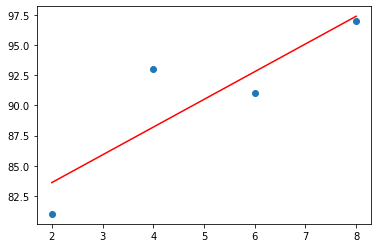

In [29]:
print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))
        
# 기울기 a의 값과 절편 b의 값을 초기화합니다.

a = 0
b = 0
# 학습률을 정합니다.
lr = 0.03

# 몇 번 반복될지 설정합니다.
epochs = 2001 

# x 값이 총 몇 개인지 셉니다.
n = len(x)

# 평균제곱오차값 계산 (실제값 - 예측값)^2 / n
mse = np.mean( (y-(a*x+b))**2 )
print('mse=', mse)

# 경사 하강법을 시작합니다.
for i in range(epochs):
  y_pred = a * x + b       # 예측 값을 구하는 식입니다.
  error = y - y_pred       # 실제 값과 비교한 오차를 error로 놓습니다.

  a_diff = (2/n) * sum(-x * (error))   # 오차 함수를 a로 편미분한 값입니다.
  b_diff = (2/n) * sum(-(error))       # 오차 함수를 b로 편미분한 값입니다.
  print('a_diff=', a_diff)

  a = a - lr * a_diff   # 학습률을 곱해 기존의 a 값을 업데이트합니다.
  b = b - lr * b_diff   # 학습률을 곱해 기존의 b 값을 업데이트합니다.

  print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))
          
  # 앞서 구한 최종 a 값을 기울기, b 값을 y 절편에 대입해 그래프를 그립니다.
  y_pred = a * x + b    

# 그래프를 출력합니다.
plt.scatter(x, y)
plt.plot(x, y_pred,'r')
plt.show()

# 기울기가 0일때
# mse= 8225.0
# a_diff= -928.0
# epoch=2000, 기울기=27.8400, 절편=5.4300

In [ ]:
# sequential : 순서대로
